In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Path = "sample_data/Telco-Customer-Churn.csv"

data = pd.read_csv(Path)

data = data.drop('customerID',axis=1)

In [ ]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
churn_counts = data['Churn'].value_counts(normalize=True) * 100
print(churn_counts)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

<ipython-input-215-1ca076cb5902>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})


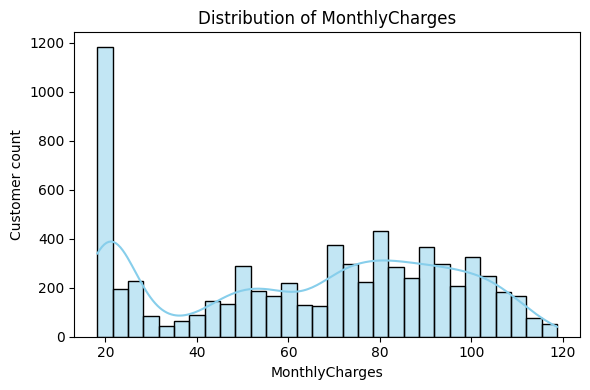

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthlyCharges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Customer count')
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(6, 4))
# sns.histplot(data['TotalCharges'], kde=True, bins=30, color='skyblue')
# plt.title('Distribution of TotalCharges')
# plt.xlabel('TotalCharges')
# plt.ylabel('Customer count')
# plt.tight_layout()
# plt.show()

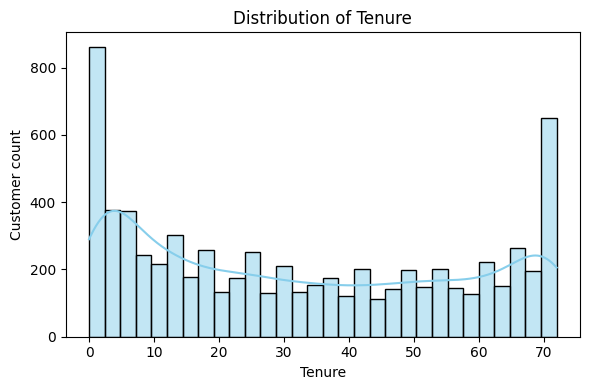

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['tenure'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Customer count')
plt.tight_layout()
plt.show()

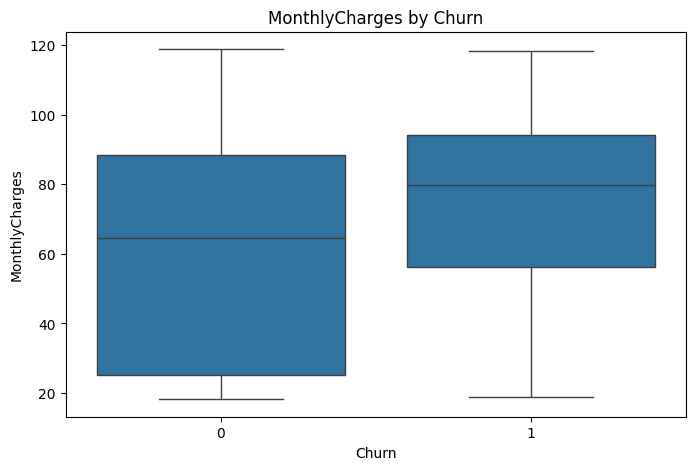

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('MonthlyCharges by Churn')
plt.show()

In [ ]:
# plt.figure(figsize=(8, 5))
# sns.boxplot(x='Churn', y='TotalCharges', data=data)
# plt.title('TotalCharges by Churn')
# plt.show()

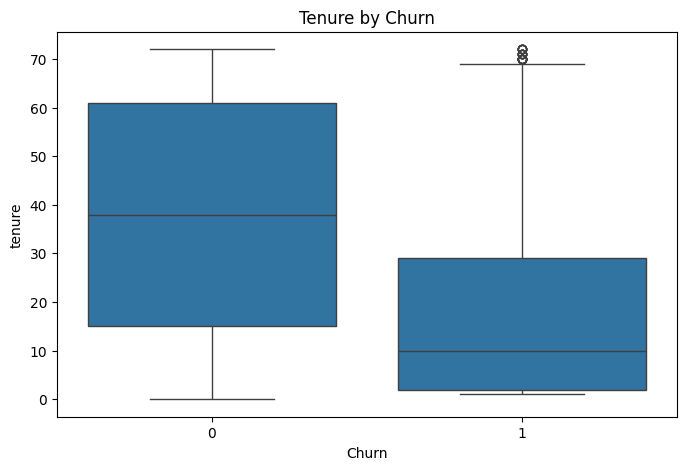

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure by Churn')
plt.show()

In [ ]:
gender_Label = LabelEncoder()
data['gender'] = gender_Label.fit_transform(data['gender'])

In [ ]:
Partner_Label = LabelEncoder()
data['Partner'] = Partner_Label.fit_transform(data['Partner'])

In [ ]:
Dependents_Label = LabelEncoder()
data['Dependents'] = Dependents_Label.fit_transform(data['Dependents'])

In [ ]:
PhoneService_Label = LabelEncoder()
data['PhoneService'] = PhoneService_Label.fit_transform(data['PhoneService'])

In [ ]:
MultipleLines_Label = LabelEncoder()
data['MultipleLines'] = MultipleLines_Label.fit_transform(data['MultipleLines'])

In [ ]:
OnlineSecurity_Label = LabelEncoder()
data['OnlineSecurity'] = OnlineSecurity_Label.fit_transform(data['OnlineSecurity'])

In [ ]:
OnlineBackup_Label = LabelEncoder()
data['OnlineBackup'] = OnlineBackup_Label.fit_transform(data['OnlineBackup'])

In [ ]:
DeviceProtection_Label = LabelEncoder()
data['DeviceProtection'] = DeviceProtection_Label.fit_transform(data['DeviceProtection'])

In [ ]:
TechSupport_Label = LabelEncoder()
data['TechSupport'] = TechSupport_Label.fit_transform(data['TechSupport'])

In [ ]:
StreamingTV_Label = LabelEncoder()
data['StreamingTV'] = StreamingTV_Label.fit_transform(data['StreamingTV'])

In [ ]:
StreamingMovies_Label = LabelEncoder()
data['StreamingMovies'] = StreamingMovies_Label.fit_transform(data['StreamingMovies'])

In [ ]:
PaperlessBilling_Label = LabelEncoder()
data['PaperlessBilling'] = PaperlessBilling_Label.fit_transform(data['PaperlessBilling'])

In [ ]:
internet_service_OneHot = OneHotEncoder()
internet_service_data = internet_service_OneHot.fit_transform(data[['InternetService']])
internet_service_df = pd.DataFrame(internet_service_data.toarray(), columns=internet_service_OneHot.get_feature_names_out(['InternetService']))
data = pd.concat([data, internet_service_df], axis=1)
data = data.drop('InternetService',axis=1)

In [ ]:
contract_OneHot = OneHotEncoder()
contract_data = contract_OneHot.fit_transform(data[['Contract']])
contract_df = pd.DataFrame(contract_data.toarray(), columns=contract_OneHot.get_feature_names_out(['Contract']))
data = pd.concat([data, contract_df], axis=1)
data = data.drop('Contract',axis=1)

In [ ]:
payment_OneHot = OneHotEncoder()
payment_data = payment_OneHot.fit_transform(data[['PaymentMethod']])
payment_df = pd.DataFrame(payment_data.toarray(), columns=payment_OneHot.get_feature_names_out(['PaymentMethod']))
data = pd.concat([data, payment_df], axis=1)
data = data.drop('PaymentMethod',axis=1)

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data = data.dropna()

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,2,0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,2,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,1,2,0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print(X.isnull().sum())

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMet

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
print(X_train[10])

[1.         1.         1.         0.         0.07042254 1.
 1.         0.         0.         1.         0.         0.
 0.         1.         0.62182362 0.05057149 0.         1.
 0.         1.         0.         0.         0.         0.
 1.         0.        ]


In [ ]:
print(X_test[0])

[1.         0.         0.         0.         0.05633803 1.
 0.         0.         0.         0.         0.         1.
 0.         1.         0.61484803 0.04381516 0.         1.
 0.         1.         0.         0.         0.         0.
 0.         1.        ]


In [ ]:
lr_model = LogisticRegression()
# lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)
probs = lr_model.predict_proba(X_test)
churn_probs = probs[:, 1]

print(f"Accuracy: {lr_model.score(X_test, y_test) * 100:.2f}%") # Accuracy = (TP + TN) / (TP + TN + FP + FN)

Accuracy: 80.24%


In [ ]:
for i in range(10):
    print(f"Customer {i+1}: {churn_probs[i]*100:.2f}% {'CHURN' if churn_probs[i]>=0.5 else 'NO CHURN'}")

Customer 1: 62.90% CHURN
Customer 2: 5.86% NO CHURN
Customer 3: 59.13% CHURN
Customer 4: 13.60% NO CHURN
Customer 5: 2.82% NO CHURN
Customer 6: 21.77% NO CHURN
Customer 7: 9.57% NO CHURN
Customer 8: 71.69% CHURN
Customer 9: 23.90% NO CHURN
Customer 10: 67.99% CHURN


In [ ]:
def preprocess(gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges):
    gender_encoded = gender_Label.transform([gender])[0]
    Partner_encoded = Partner_Label.transform([Partner])[0]
    Dependents_encoded = Dependents_Label.transform([Dependents])[0]
    PhoneService_encoded = PhoneService_Label.transform([PhoneService])[0]
    MultipleLines_encoded = MultipleLines_Label.transform([MultipleLines])[0]
    OnlineSecurity_encoded = OnlineSecurity_Label.transform([OnlineSecurity])[0]
    OnlineBackup_encoded = OnlineBackup_Label.transform([OnlineBackup])[0]
    DeviceProtection_encoded = DeviceProtection_Label.transform([DeviceProtection])[0]
    TechSupport_encoded = TechSupport_Label.transform([TechSupport])[0]
    StreamingTV_encoded = StreamingTV_Label.transform([StreamingTV])[0]
    StreamingMovies_encoded = StreamingMovies_Label.transform([StreamingMovies])[0]
    PaperlessBilling_encoded = PaperlessBilling_Label.transform([PaperlessBilling])[0]

    internet_service_encoded = internet_service_OneHot.transform(pd.DataFrame([[InternetService]], columns=["InternetService"])).toarray()
    payment_method_encoded = payment_OneHot.transform(pd.DataFrame([[PaymentMethod]], columns=["PaymentMethod"])).toarray()
    contract_encoded = contract_OneHot.transform(pd.DataFrame([[Contract]], columns=["Contract"])).toarray()

    one_hot_encoded_data = np.concatenate([internet_service_encoded, payment_method_encoded, contract_encoded], axis=1)

    remain_data = np.array([[gender_encoded, SeniorCitizen, Partner_encoded, Dependents_encoded, tenure, PhoneService_encoded, MultipleLines_encoded, OnlineSecurity_encoded, OnlineBackup_encoded, DeviceProtection_encoded, TechSupport_encoded, StreamingTV_encoded, StreamingMovies_encoded, PaperlessBilling_encoded, MonthlyCharges, TotalCharges]])

    if one_hot_encoded_data.ndim == 1:
        one_hot_encoded_data = one_hot_encoded_data.reshape(1, -1)

    full_data = np.hstack((remain_data, one_hot_encoded_data))

    full_data_df = pd.DataFrame(full_data, columns=Scaler.feature_names_in_)

    scaler_data = Scaler.transform(full_data_df)

    return scaler_data

In [ ]:
def predict(preprocessed_data):
    result = lr_model.predict_proba(preprocessed_data)
    return result[0][1]*100

In [ ]:
# Yes
preprocessed_data = preprocess(
    gender="Male",
    SeniorCitizen=0,
    Partner="No",
    Dependents="No",
    tenure=2,
    PhoneService="Yes",
    MultipleLines="No",
    InternetService="DSL",
    OnlineSecurity="Yes",
    OnlineBackup="Yes",
    DeviceProtection="No",
    TechSupport="No",
    StreamingTV="No",
    StreamingMovies="No",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Mailed check",
    MonthlyCharges=53.85,
    TotalCharges=108.15
)

print(predict(preprocessed_data))

15.182046596333532


In [ ]:
# Yes
preprocessed_data_1 = preprocess(
    gender="Male",
    SeniorCitizen=0,
    Partner="No",
    Dependents="No",
    tenure=34,
    PhoneService="Yes",
    MultipleLines="Yes",
    InternetService="Fiber optic",
    OnlineSecurity="No",
    OnlineBackup="Yes",
    DeviceProtection="Yes",
    TechSupport="No",
    StreamingTV="Yes",
    StreamingMovies="Yes",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Electronic check",
    MonthlyCharges=106.35,
    TotalCharges=3549.25
)

print(predict(preprocessed_data_1))

19.24367556594695


In [ ]:
# Yes
preprocessed_data_2 = preprocess(
    gender="Female",
    SeniorCitizen=0,
    Partner="No",
    Dependents="No",
    tenure=11,
    PhoneService="Yes",
    MultipleLines="Yes",
    InternetService="Fiber optic",
    OnlineSecurity="No",
    OnlineBackup="No",
    DeviceProtection="Yes",
    TechSupport="No",
    StreamingTV="Yes",
    StreamingMovies="Yes",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Bank transfer (automatic)",
    MonthlyCharges=97.85,
    TotalCharges=1105.4
)

print(predict(preprocessed_data_2))

71.12427365584479


In [ ]:
# Yes
preprocessed_data_3 = preprocess(
    gender="Female",
    SeniorCitizen=0,
    Partner="Yes",
    Dependents="No",
    tenure=28,
    PhoneService="Yes",
    MultipleLines="Yes",
    InternetService="Fiber optic",
    OnlineSecurity="No",
    OnlineBackup="No",
    DeviceProtection="Yes",
    TechSupport="Yes",
    StreamingTV="Yes",
    StreamingMovies="Yes",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Electronic check",
    MonthlyCharges=104.8,
    TotalCharges=3046.05
)

print(predict(preprocessed_data_3))

22.42197007950571


In [ ]:
# No
preprocessed_data_4 = preprocess(
    gender="Male",
    SeniorCitizen=0,
    Partner="No",
    Dependents="Yes",
    tenure=22,
    PhoneService="Yes",
    MultipleLines="Yes",
    InternetService="Fiber optic",
    OnlineSecurity="No",
    OnlineBackup="Yes",
    DeviceProtection="No",
    TechSupport="No",
    StreamingTV="Yes",
    StreamingMovies="No",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Credit card (automatic)",
    MonthlyCharges=89.1,
    TotalCharges=1949.4
)

print(predict(preprocessed_data_4))

28.940206530266476


In [ ]:
y_test[:10]

,Churn
6610,0
6785,1
7018,1
4097,0
6248,0
120,0
2196,0
5905,0
890,0
427,0


In [ ]:
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
probs[:10]

array([[0.37097137, 0.62902863],
       [0.94138318, 0.05861682],
       [0.4086646 , 0.5913354 ],
       [0.86404346, 0.13595654],
       [0.97178683, 0.02821317],
       [0.78233403, 0.21766597],
       [0.90425271, 0.09574729],
       [0.28305473, 0.71694527],
       [0.76099269, 0.23900731],
       [0.3200862 , 0.6799138 ]])

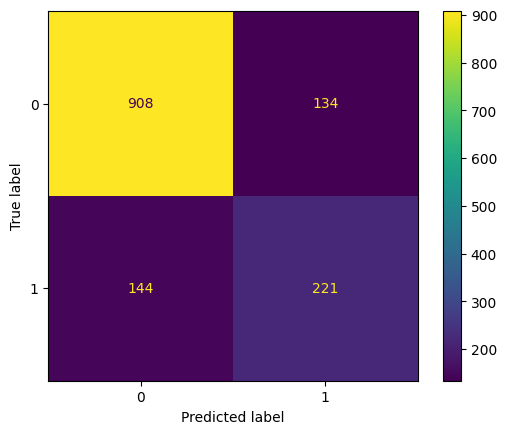

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# Precision, Recall, F1-score

# accuracy = (TP + TN) / (TP + TN + FP + FN)  Độ chính xác
# precision = TP / (TP + FP)                  Độ chính xác của lớp churn
# recall = TP / (TP + FN)                     Tỷ lệ phát hiện churn đúng
# f1_score = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1042
           1       0.62      0.61      0.61       365

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



=> Cân bằng lại dữ liệu (Class balancing):  dùng class_weight='balanced' khi huấn luyện

=> Tối ưu ngưỡng phân loại (threshold tuning): Có thể giảm ngưỡng (ví dụ 0.4) để tăng recall cho class 1.

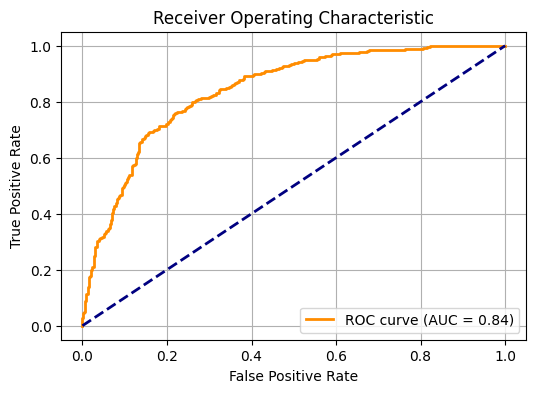

In [ ]:
# ROC (Receiver Operating Characteristic) Curve + AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
for i in range(0, len(thresholds), 50):
    print(f"Threshold: {thresholds[i]:.2f} - TPR: {tpr[i]:.2f} - FPR: {fpr[i]:.2f}")

Threshold: inf - TPR: 0.00 - FPR: 0.00
Threshold: 0.67 - TPR: 0.31 - FPR: 0.04
Threshold: 0.58 - TPR: 0.46 - FPR: 0.08
Threshold: 0.48 - TPR: 0.65 - FPR: 0.13
Threshold: 0.34 - TPR: 0.75 - FPR: 0.21
Threshold: 0.23 - TPR: 0.83 - FPR: 0.32
Threshold: 0.14 - TPR: 0.91 - FPR: 0.45
Threshold: 0.04 - TPR: 0.98 - FPR: 0.67


Ưu tiên Recall cao → chọn threshold thấp hơn

Ưu tiên Precision cao → chọn threshold cao hơn

In [ ]:
# Find optimal threshold: max(TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.33484086279556985


In [ ]:
y_pred_custom = (probs[:,1] >= 0.33)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1042
           1       0.54      0.76      0.63       365

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407



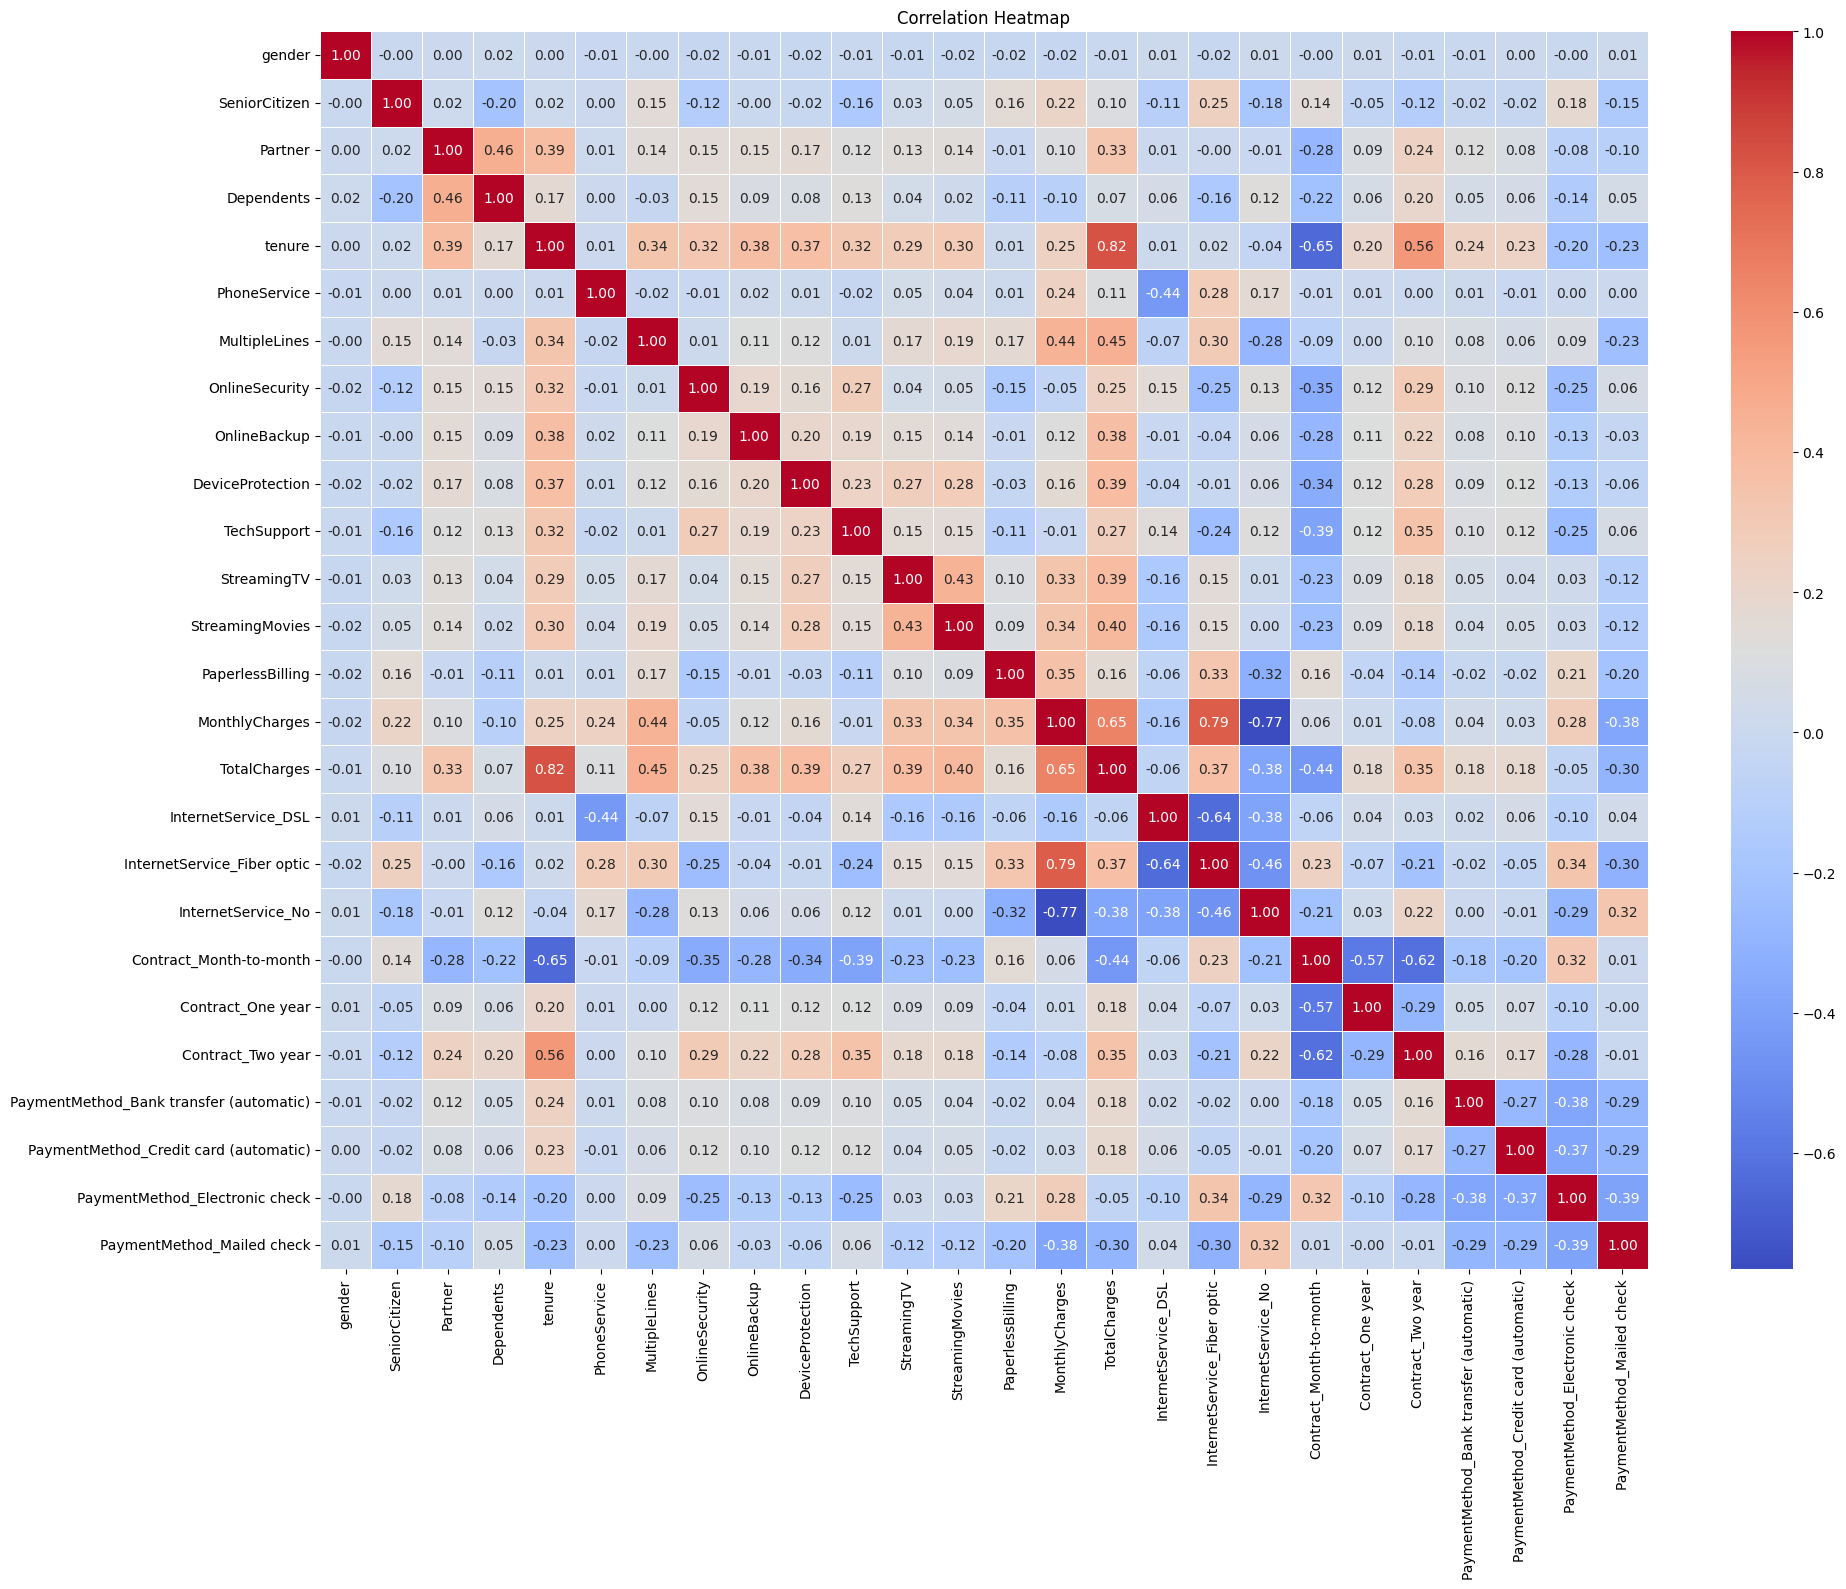

In [ ]:
data_encoded = pd.DataFrame(X_train, columns=Scaler.feature_names_in_)

plt.figure(figsize=(20, 16))
corr_matrix = data_encoded.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

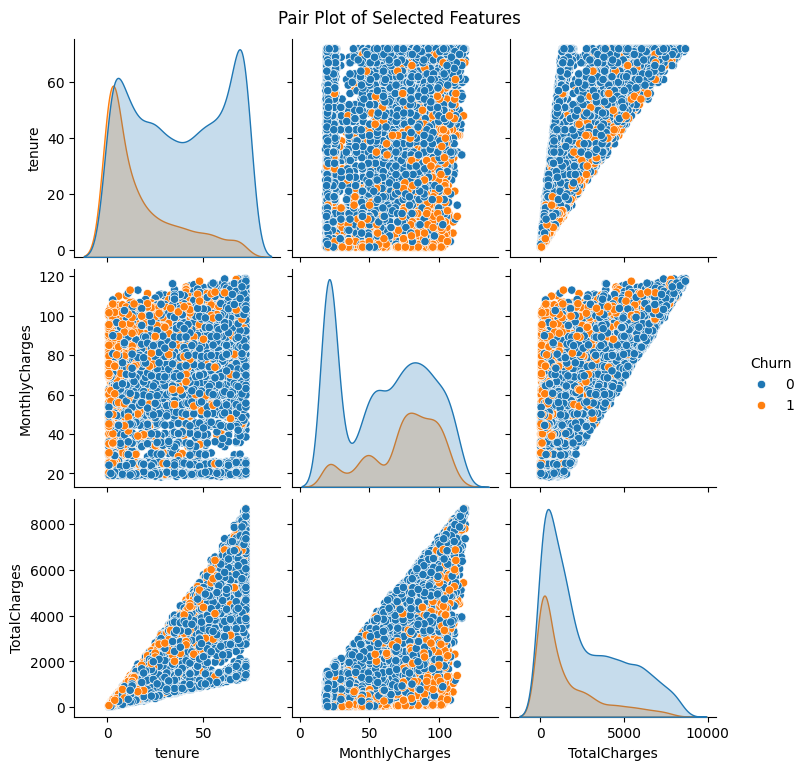

In [ ]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[selected_features] = data[selected_features].apply(pd.to_numeric, errors='coerce')
sns.pairplot(data.dropna(), vars=selected_features, hue='Churn')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

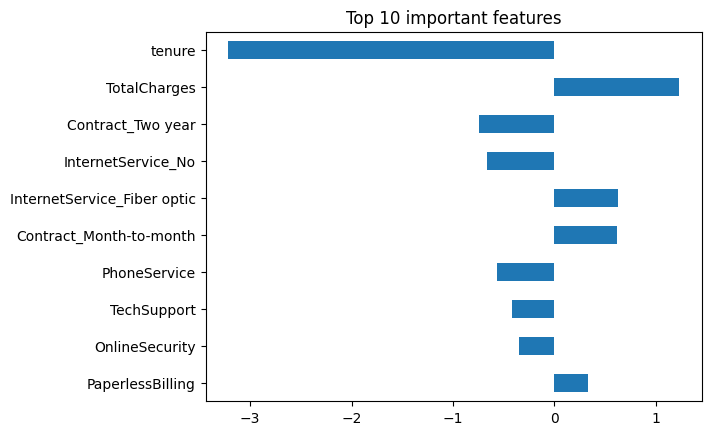

In [ ]:
importance = lr_model.coef_[0]
feature_names = Scaler.feature_names_in_  # Scaler of preprocess
feature_importance = pd.Series(importance, index=feature_names).sort_values(key=abs, ascending=False)

feature_importance[:10].plot(kind='barh', title='Top 10 important features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
with open('lr_model.pkl', 'wb') as lr_f:
  pickle.dump(lr_model, lr_f)
with open('Scaler.pkl', 'wb') as scaler_f:
  pickle.dump(Scaler, scaler_f)

In [ ]:
with open('internet_service_OneHot.pkl', 'wb') as file:
    pickle.dump(internet_service_OneHot, file)
with open('payment_OneHot.pkl', 'wb') as file:
    pickle.dump(payment_OneHot, file)
with open('contract_OneHot.pkl', 'wb') as file:
    pickle.dump(contract_OneHot, file)

In [ ]:
with open('gender_Label.pkl', 'wb') as file:
    pickle.dump(gender_Label, file)
with open('Partner_Label.pkl', 'wb') as file:
    pickle.dump(Partner_Label, file)
with open('Dependents_Label.pkl', 'wb') as file:
    pickle.dump(Dependents_Label, file)
with open('PhoneService_Label.pkl', 'wb') as file:
    pickle.dump(PhoneService_Label, file)
with open('MultipleLines_Label.pkl', 'wb') as file:
    pickle.dump(MultipleLines_Label, file)
with open('OnlineSecurity_Label.pkl', 'wb') as file:
    pickle.dump(OnlineSecurity_Label, file)
with open('OnlineBackup_Label.pkl', 'wb') as file:
    pickle.dump(OnlineBackup_Label, file)
with open('DeviceProtection_Label.pkl', 'wb') as file:
    pickle.dump(DeviceProtection_Label, file)
with open('TechSupport_Label.pkl', 'wb') as file:
    pickle.dump(TechSupport_Label, file)
with open('StreamingTV_Label.pkl', 'wb') as file:
    pickle.dump(StreamingTV_Label, file)
with open('StreamingMovies_Label.pkl', 'wb') as file:
    pickle.dump(StreamingMovies_Label, file)
with open('PaperlessBilling_Label.pkl', 'wb') as file:
    pickle.dump(PaperlessBilling_Label, file)

In [ ]:
def load_file():
    with open('lr_model.pkl', 'rb') as lr_f:
      lr_model = pickle.load(lr_f)
    with open('Scaler.pkl', 'rb') as scaler_f:
      Scaler = pickle.load(scaler_f)

    with open('internet_service_OneHot.pkl', 'rb') as file:
      internet_service_OneHot = pickle.load(file)
    with open('payment_OneHot.pkl', 'rb') as file:
      payment_OneHot = pickle.load(file)
    with open('contract_OneHot.pkl', 'rb') as file:
      contract_OneHot = pickle.load(file)

    with open('gender_Label.pkl', 'rb') as file:
      gender_Label = pickle.load(file)
    with open('Partner_Label.pkl', 'rb') as file:
      Partner_Label = pickle.load(file)
    with open('Dependents_Label.pkl', 'rb') as file:
      Dependents_Label = pickle.load(file)
    with open('PhoneService_Label.pkl', 'rb') as file:
      PhoneService_Label = pickle
    with open('MultipleLines_Label.pkl', 'rb') as file:
      MultipleLines_Label = pickle.load(file)
    with open('OnlineSecurity_Label.pkl', 'rb') as file:
      OnlineSecurity_Label = pickle.load(file)
    with open('OnlineBackup_Label.pkl', 'rb') as file:
      OnlineBackup_Label = pickle.load(file)
    with open('DeviceProtection_Label.pkl', 'rb') as file:
      DeviceProtection_Label = pickle.load
    with open('TechSupport_Label.pkl', 'rb') as file:
      TechSupport_Label = pickle.load
    with open('StreamingTV_Label.pkl', 'rb') as file:
      StreamingTV_Label = pickle.load
    with open('StreamingMovies_Label.pkl', 'rb') as file:
      StreamingMovies_Label = pickle.load
    with open('PaperlessBilling_Label.pkl', 'rb') as file:
      PaperlessBilling_Label = pickle.load

    return lr_model, Scaler, internet_service_OneHot, payment_OneHot, contract_OneHot, gender_Label, Partner_Label, Dependents_Label, PhoneService_Label, MultipleLines_Label, OnlineSecurity_Label, OnlineBackup_Label, DeviceProtection_Label, TechSupport_Label, StreamingTV_Label, StreamingMovies_Label, PaperlessBilling_Label